This notebook demonstrates some weirdness with the scipy interpolate method.  We will set up a simple x axis from -10 to 10 and then try to interpolate various functions on it.  The results are not really what I expected.

The interpolate method uses fitpack (which wraps the NETLIB fitpack method) and contains this warning:

Even values of `k` should be avoided especially with a small s-value.

It doesn't explain why, however.

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;


<IPython.core.display.Javascript object>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

%matplotlib inline

N=100
x=np.asarray(range(N))/5.-10
# graphing function
def makethemgraphs(a,b):
   for kind in ['nearest','linear','zero','slinear','quadratic','cubic',4,5,6,7]:
      xi=np.linspace(np.min(a)-0.2,np.max(a)+0.2,len(a)*10)
      f=interp1d(a,b,kind=kind,bounds_error=False,assume_sorted=True)
      yi=f(xi)
      dummy=plt.plot(a,b,'bo',xi,yi,'r-')
      dummy=plt.title("Closeup interpolation using method %s"%(kind,))
      yl=plt.ylim()
      yr=yl[1]-yl[0]
      plt.ylim((yl[0]-yr*.1,yl[1]+yr*.1))
      plt.show()


# Case 1: Square wave

There are strong oscillations in the case of even orders, but the oscillations damp out in the case of odd orders.

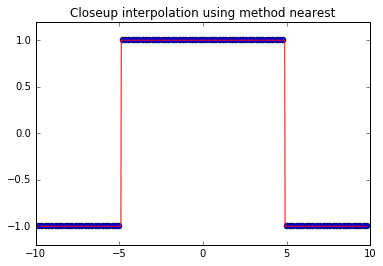

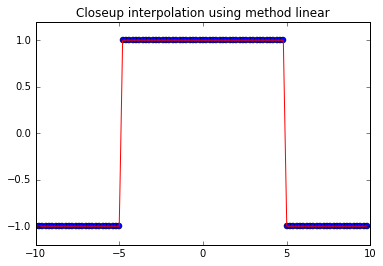

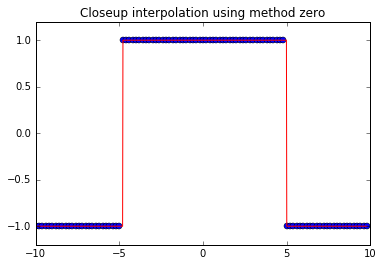

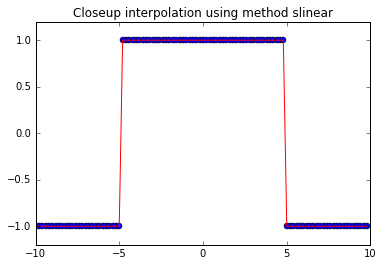

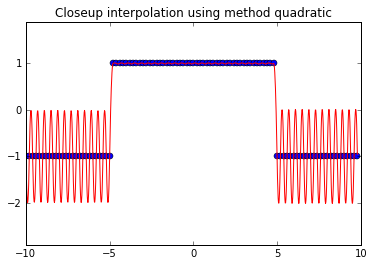

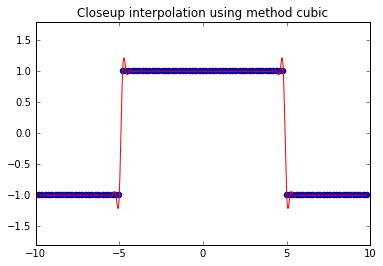

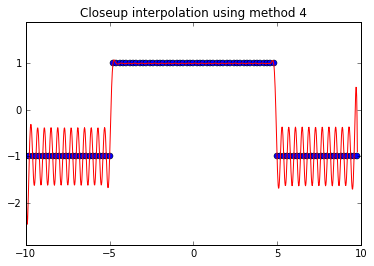

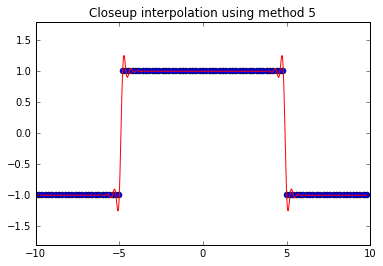

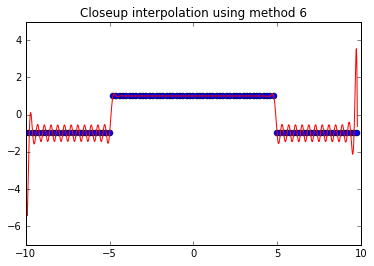

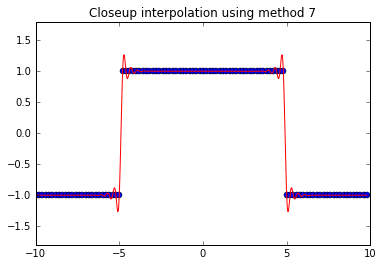

In [12]:
y=map(lambda z:1 if z>-5 and z<5 else -1,x)
makethemgraphs(x,y)

In [ ]:
# Sine wave

Works just fine - in the noiseless case

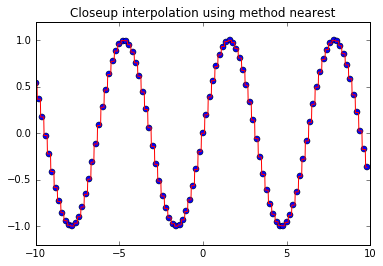

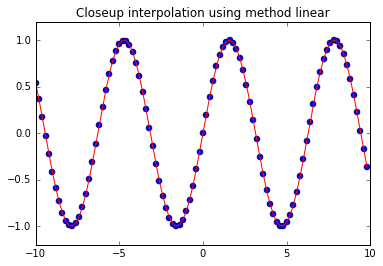

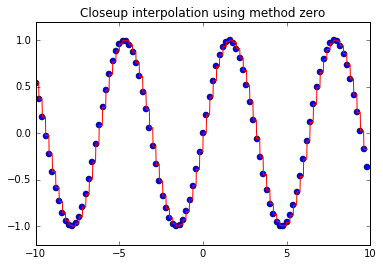

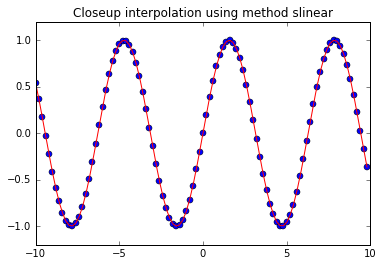

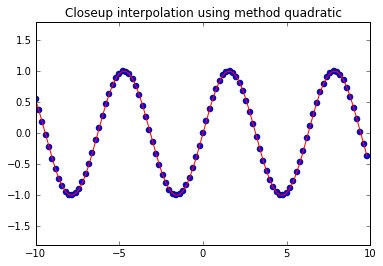

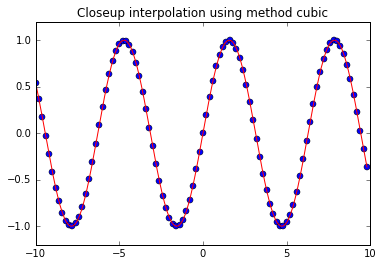

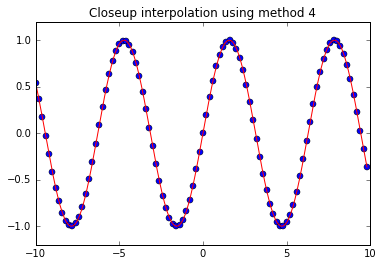

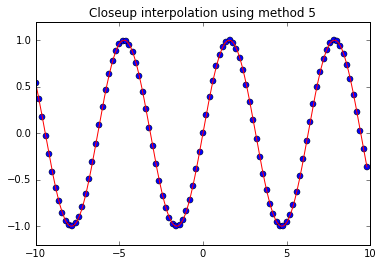

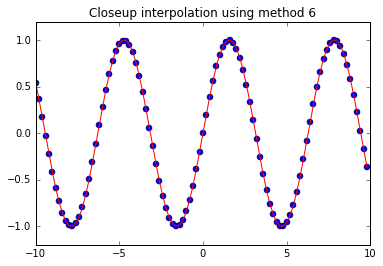

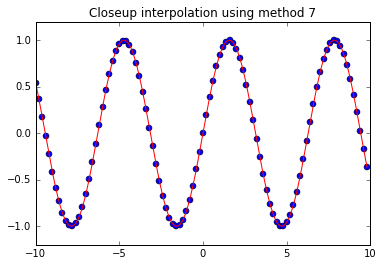

In [15]:
y=np.sin(x) #+np.random.randn(len(x))*.1
makethemgraphs(x,y)

A bit of noise shows that the even orders perform much worse.

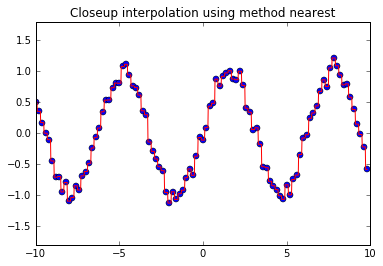

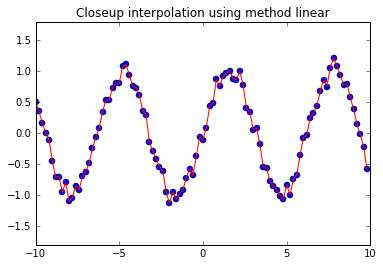

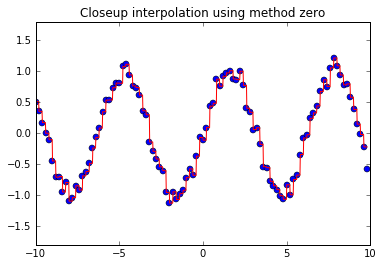

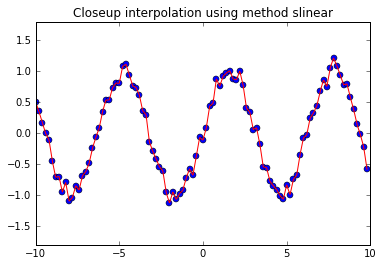

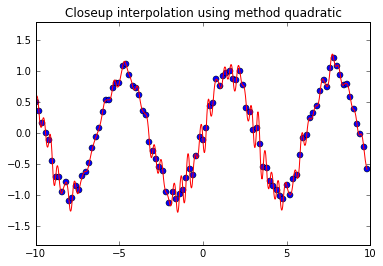

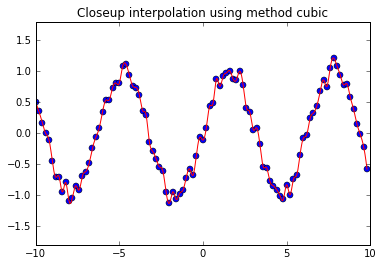

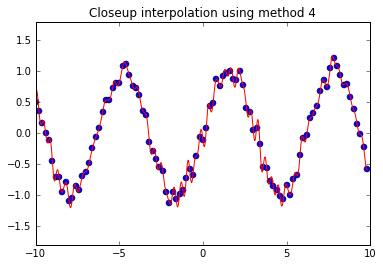

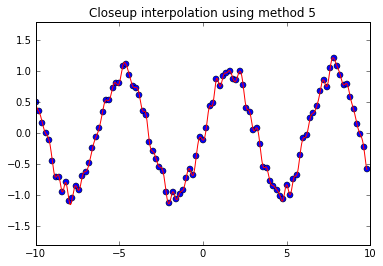

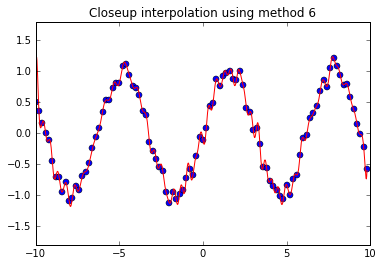

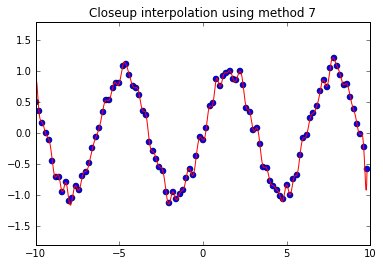

In [21]:
y=np.sin(x) +np.random.randn(len(x))*.1
makethemgraphs(x,y)

# Quantization noise

A quantized quadratic also shows the oscillation in the even cases.

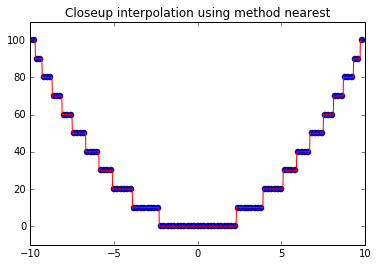

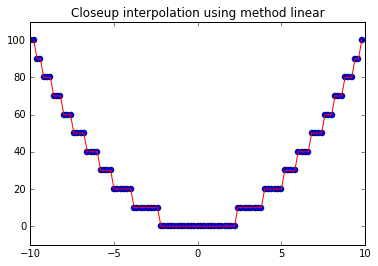

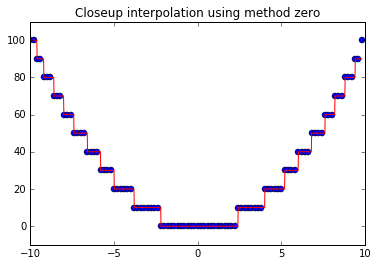

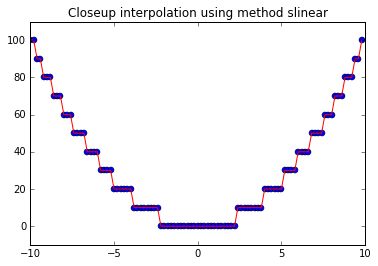

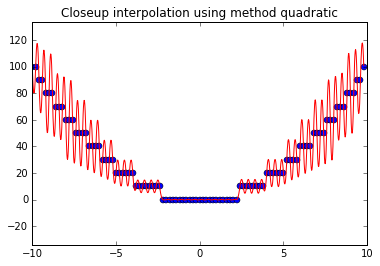

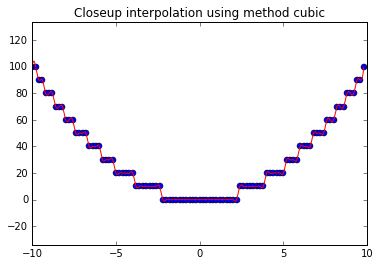

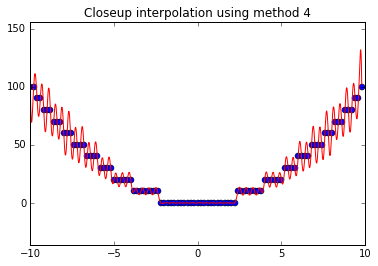

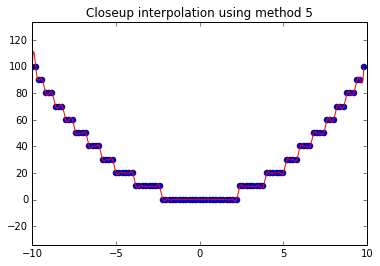

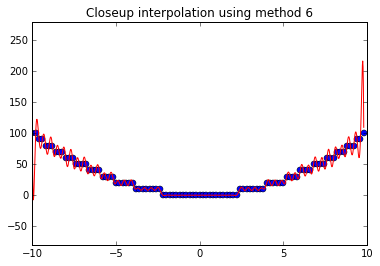

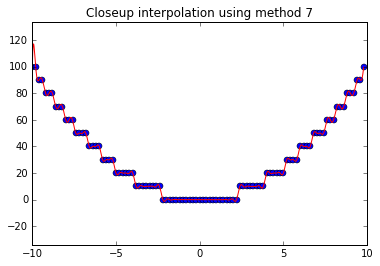

In [18]:
y=np.round(x*x/10)*10
makethemgraphs(x,y)